In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np

file_url = 'phrenology_folds.xlsx'

def countlist(l):
    counts = dict()
    for i in l:
        counts[i] = counts.get(i, 0) + 1
    return counts

def avg_col(xl, col):
    temp_col = getcol_full(xl, col)
    col_list = []
    for i in temp_col:
        if not math.isnan(i):
            col_list.append(float(i))
    return sum(col_list) / len(col_list)

def getsheet(xl, n):
    return xl.parse(xl.sheet_names[n])

#use to get a list of all the values in a columns across ALL sheets
def getcol(xl, c):
    clist = []
    for s in xl.sheet_names:
        try:
            clist.extend(xl.parse(s)[c])
        except Exception as e:
            print(e)
    return clist

def graph_cols(xl, c1, c2):
    x = np.array(getcol_full(xl, c1))
    y = np.array(getcol_full(xl, c2))
    fig, ax = plt.subplots()
    ax.set_title(c1 + " vs " + c2)
    plt.scatter(x, y)
    plt.show()
    
def piegraph(counts, title):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cs = list(counts.values())
    labels = list(counts.keys())
    plt.pie(cs, labels=labels)
    plt.show()    
    
matplotlib.rcParams['figure.figsize'] = [10, 10]
data_xl = pd.ExcelFile(file_url)

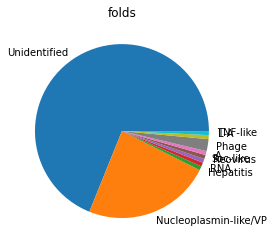

In [29]:
folds = getcol(data_xl, 'fold')
fold_counts = countlist(folds)

piegraph(fold_counts, 'folds')

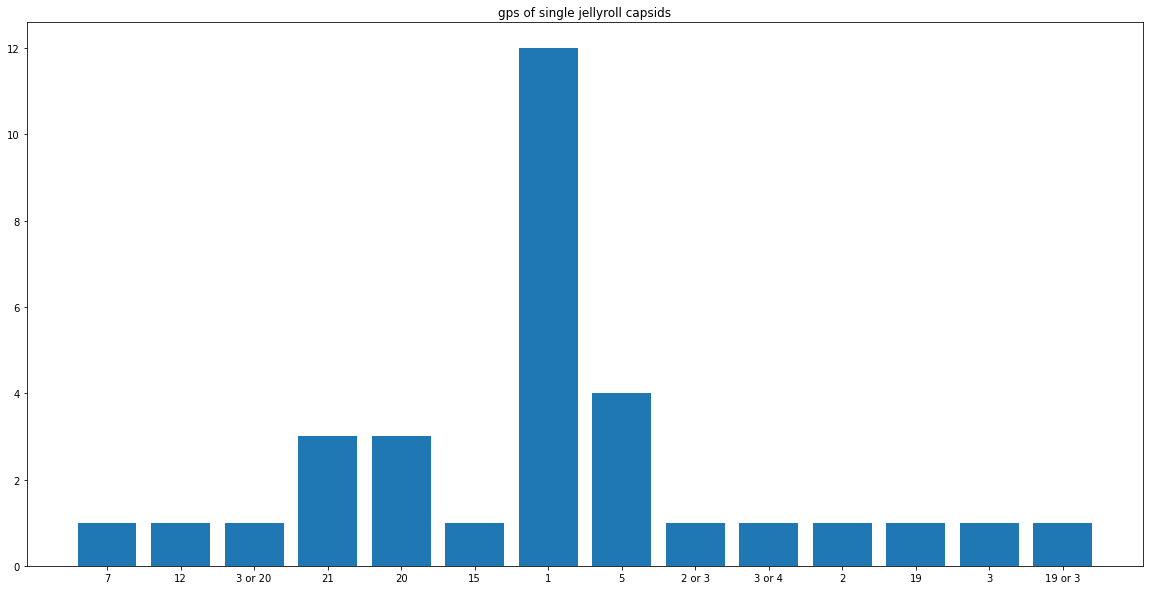

In [31]:
gps = getcol(data_xl, 'GP')


for i, f in enumerate(folds):
    jelly_gps = [str(gps[i]) for i in range(len(folds)) if folds[i] == 'Nucleoplasmin-like/VP']

jelly_counts = countlist(jelly_gps)

matplotlib.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.set_title("gps of single jellyroll capsids")
plt.bar(*zip(*jelly_counts.items()))
plt.show() 